# DSE 207R FINAL PROJECT 
## Alec Bothwell
## Fall 2022

## **Step 1: Find a dataset or datasets**

### *Hotel Booking Dataset*
I chose to investigate this hotel booking dataset as I enjoy travel and this dataset seemed very extensive in terms of data that was collected around different stays. I want to work with this data to find common trends in hotel stays and to possibly provide some life-hacks into my future stays.

In [1]:
#All imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import dataset
df = pd.read_csv("hotel_bookings.csv")

## **Step 2: Explore the datasets**
###### Are there quality issues in the dataset (noisy, missing data, etc.)? 
Discussed in *Removing bad data*.
###### What will you need to do to clean and/or transform the raw data for analysis?
Discussed in *Removing bad data* and *Feature engineering*. These two sections cover the need to remove some of missing, null, noisy, etc. data, and then we add many columns as well.
###### How are the data distributed? 
We used histograms to see how the data was distributed, and more is discussed in the *Visualizing spread of data* section
###### What are some common trends?
Investigated in the *Visualizing spread of data* and *Exploring numerical data to find trends* sections. We observed skews in some of the histograms that pointed to groupings of observations which also line up with the describe function we ran. Some examples of trends include seeing that there is a grouping of observations around the summertime and that generally 2 adults stay in these hotels compared to 1 individual or more. 
###### What are the relationships between variables in your dataset?
Discussed in *Relationships between variables* and *Visualizing spread of data*

### *Defining columns*
I went through the dataset provided at this link:
###### https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?resource=download
Using this page, I was able to get further insights into what each column meant, and the context of the data. This helped in the exploration process to know what was being described in each table and visualization.

### *Exploring numerical data to find trends*
I used the info method to check data types, and the describe method to investigate different normal values in the data set, along with finding averages and data that may throw off averages.
###### EX: The Average Daily Rate's (ADR) is -6. This doesn't make sense, as there shouldn't be a negative amount of lodging transactions and could probably be thrown out as bad data.

In [2]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### *Removing bad data*
We look at NA values to identify possible mistakes. 
* Children: In this case, we see that for 4 rows the children value is null instead of 0. Instead of trying to restore this data, we will throw it out
* Country: We will keep these rows as they are significant, but if we run metrics, grouping by country, we should keep in mind that null values exist
* Agent and Company: These two columns make sense as null values

We then look at possible outliers and data that doesn't make sense

In [6]:
print("NAs for each feature:")
print(df.isna().sum())

NAs for each feature:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              

In [7]:
df.dropna(subset=["children"], inplace = True)

In [8]:
df = df[df["adr"] > 0]

### Feature Engineering
Added the following columns:
* stays_total: Sum of all nights stayed
* arrival_date: Complete date for stay (in datetime format)
* kids: Children + Babies
* guests: Adults + Children + Babies

In [9]:
df["stays_total"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["arrival_date"] = pd.to_datetime(df["arrival_date_day_of_month"].astype(str) + "-" +  df["arrival_date_month"] + "-" + df["arrival_date_year"].astype(str), format='%d-%B-%Y')
df["kids"]  = df["children"] + df["babies"]
df["guests"] = df["adults"] + df["kids"]
df["any_kids"] = False
df.loc[df['kids'] > 0, 'any_kids'] = True

### *Visualizing spread of data*
Using these histograms, we can gain some valuable insights regarding some of the columns. Here are some of my observations:
* Lead Time - Many of the reservations were done between 0-25 days with a right skew following an increasing number of days.
* Week Number = This data falls off at a relatively steady rate from a peak of week 26 - 34. It will be helpful to correlate with month and see a trend of weeks and months that are busier.
* Guests = Most stays have 2 individuals

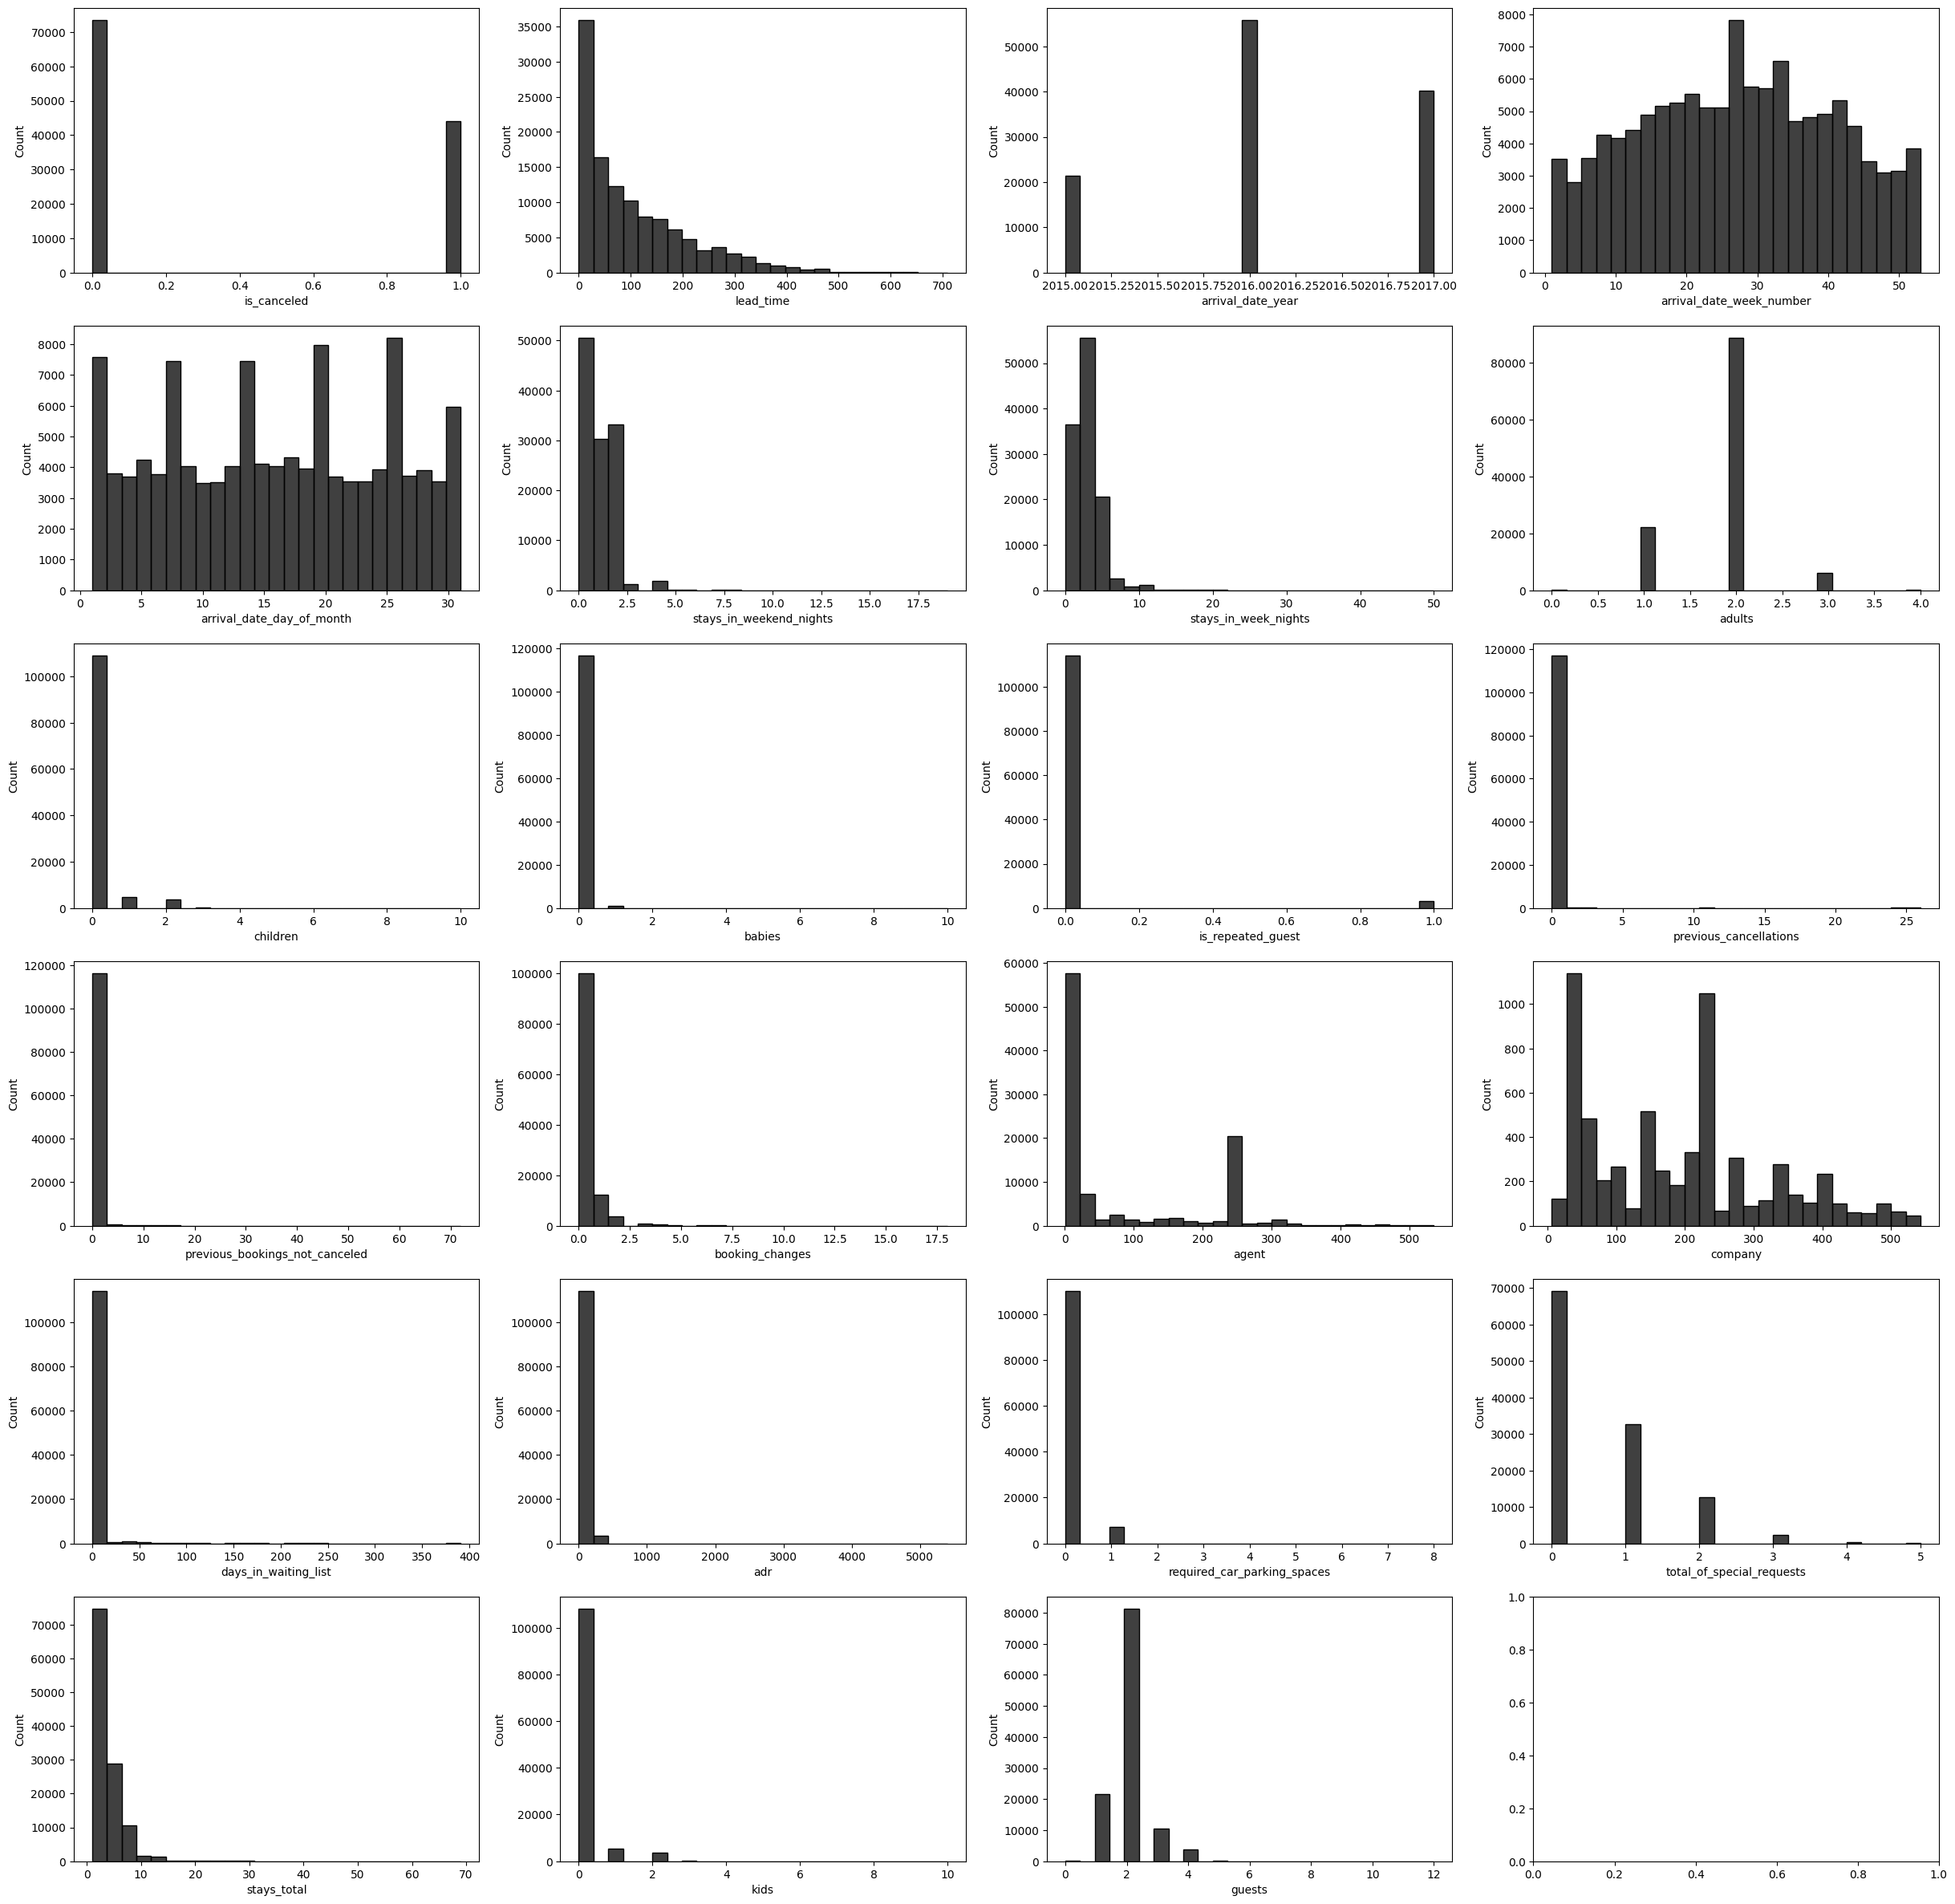

In [10]:
df_num = df.select_dtypes(include=['float64', 'int64'])
f, axes = plt.subplots(6, 4, figsize=(30, 30))
for ax, feature in zip(axes.flat, df_num.columns):
    sns.histplot(df_num[feature] , color="black", ax=ax, bins = 25)

### *Relationship between variables*
Looking at the relationship between:
* Hotel Type and Number of Individuals Staying: We can see that Hotel Type doesn't have a major impact on number of individuals staying
* Lead Time and ADR: We can see that people that are booking very far out (400 days in advance) don't necessarily spend a ton of money daily ($175 daily)
* Arrival Month and Kids: The number of kids staying in hotels is generally greater in the summer months of July and August, and then there's a swift drop off for the following three months

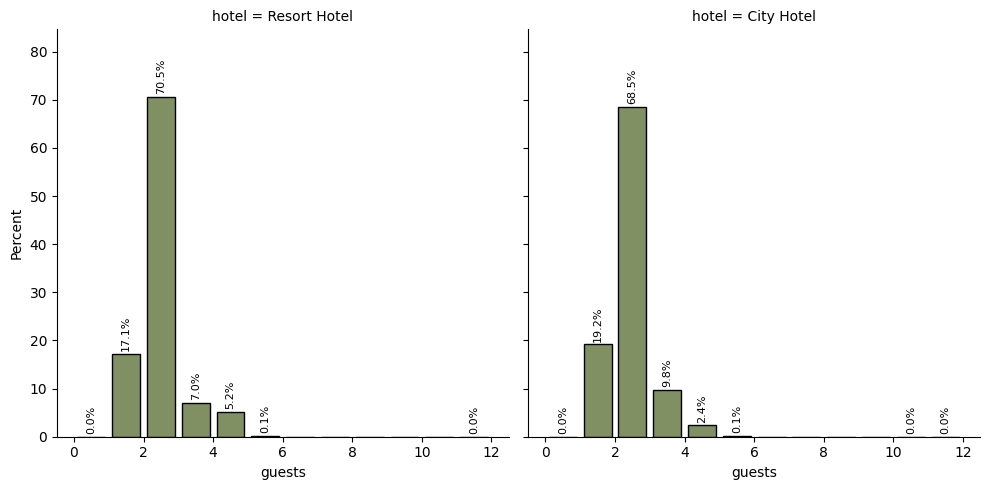

In [11]:
fg = sns.displot(data = df, x="guests", bins = 12, col = "hotel", multiple="dodge", shrink=.8, stat = "percent", common_norm = False, color = "darkolivegreen")
for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
    ax.margins(y=0.2)
plt.show()

<AxesSubplot: title={'center': "Lead Time's relationship with Average Daily Rate"}, xlabel='Lead Time', ylabel='Average Daily Rate'>

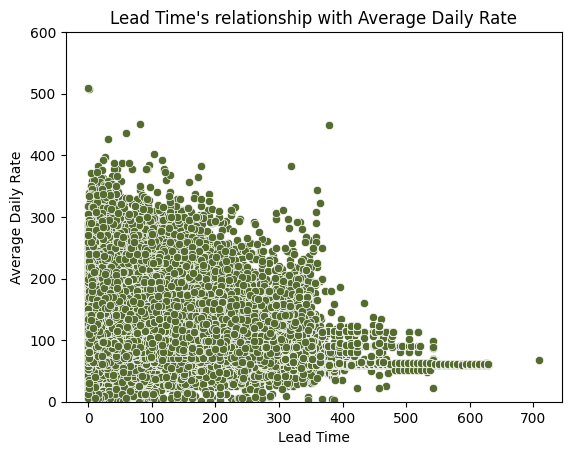

In [12]:
scatplot = sns.scatterplot(data=df, x="lead_time", y="adr", color = "darkolivegreen")
scatplot.set(xlabel = "Lead Time", ylabel = "Average Daily Rate", title= "Lead Time's relationship with Average Daily Rate")
plt.ylim(0, 600)
scatplot

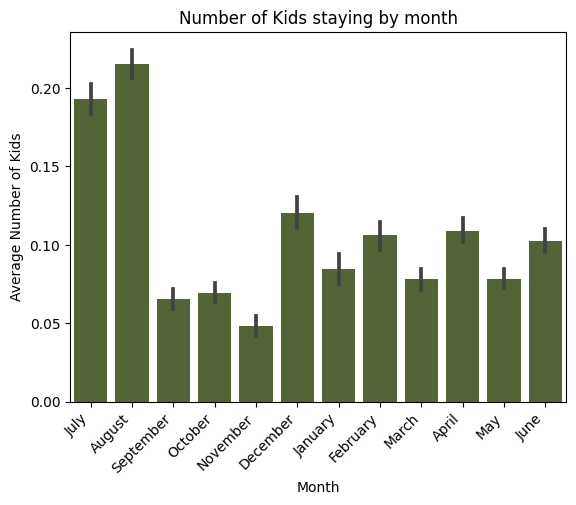

In [13]:
barplt = sns.barplot(x = df["arrival_date_month"], y = df["kids"], color = "darkolivegreen")
barplt.set(xlabel = "Month", ylabel = "Average Number of Kids", title = "Number of Kids staying by month")
barplt.set_xticklabels(barplt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## **Step 3:  Identify 3 research questions and perform analysis**

### *1. Can we build a classification model to predict if a booking will be cancelled or not?*

In [14]:
# Run this cell
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [15]:
#ToDo
X = df.drop(columns=['is_canceled', 'reservation_status', 'reservation_status_date'])
y = df['is_canceled']

In [16]:
label_encoder = preprocessing.LabelEncoder()
for i in list(X.select_dtypes(exclude=[np.number]).columns.values):
    X[i] = label_encoder.fit_transform(df[i])

In [17]:
for j in X[X.columns[X.isna().any()]].columns.values:
    X = X.replace(np.NaN,-1)

In [18]:
clf = RandomForestClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.8938090777484459

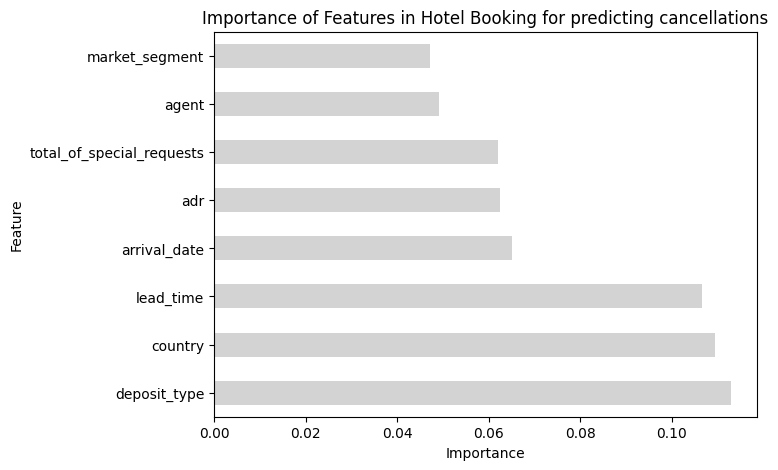

In [19]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh', figsize=(7,5), xlabel="Importance", ylabel="Feature", title="Importance of Features in Hotel Booking for predicting cancellations", color = "lightgrey");

### *2. What's the best time to travel if I'm looking to spend the least amount of money?*

In [20]:
dfq2 = df[(df["guests"] == 2) & (df["meal"] == "BB")]

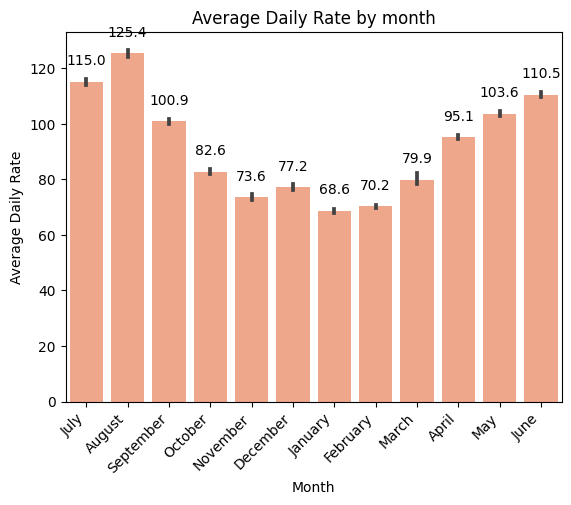

In [21]:
barplt = sns.barplot(x = dfq2["arrival_date_month"], y = dfq2["adr"], color = "lightsalmon")
barplt.set(xlabel = "Month", ylabel = "Average Daily Rate", title = "Average Daily Rate by month")
barplt.set_xticklabels(barplt.get_xticklabels(), rotation=45, horizontalalignment='right')
for i in barplt.containers:
    barplt.bar_label(i, padding=10, fmt='%.1f')
plt.show()

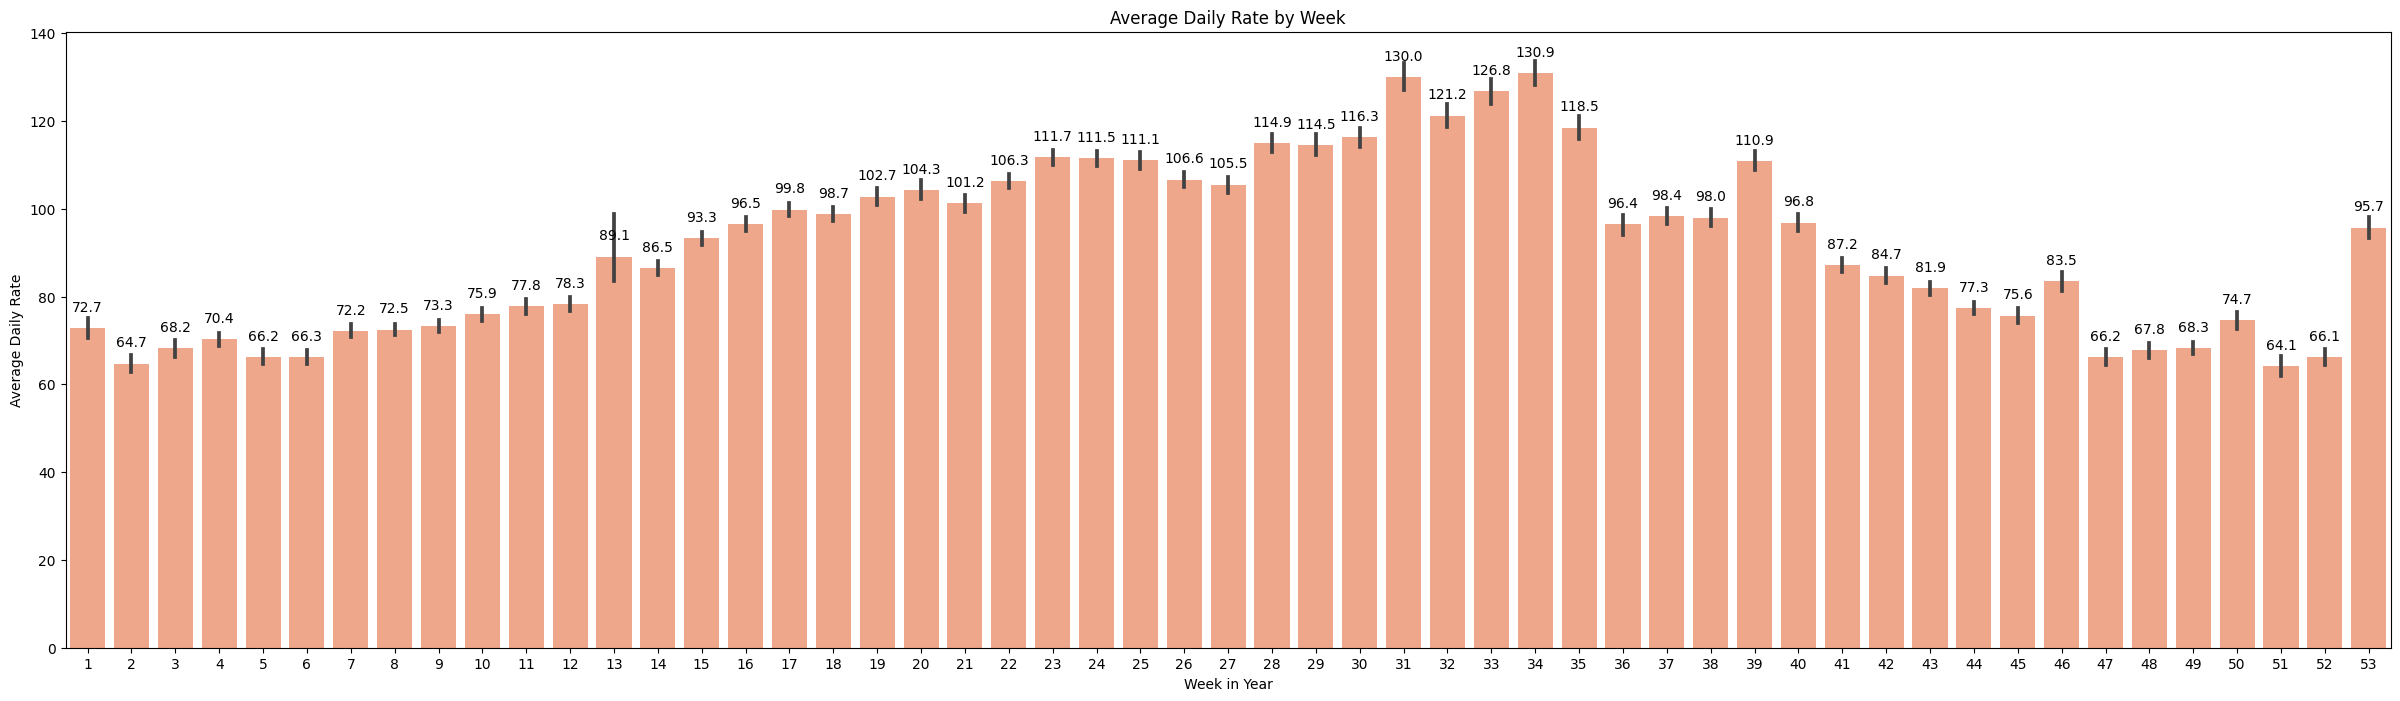

In [22]:
plt.figure(figsize = (30,8))
barplt = sns.barplot(x = dfq2["arrival_date_week_number"], y = dfq2["adr"], color = "lightsalmon")
barplt.set(xlabel = "Week in Year", ylabel = "Average Daily Rate", title = "Average Daily Rate by Week")
barplt.tick_params(labelsize=10)
for i in barplt.containers:
    barplt.bar_label(i, padding=10, fmt='%.1f')
plt.show()

### *3. Can we find any trends on what impact the numbers of individuals staying and the type of people (adults, children, babies) have on the nights stayed?*

In [23]:
df_filtered = df[["guests", "stays_total"]][df["guests"] != 0]
dfq3a = df_filtered.groupby('guests').mean()

In [24]:
df_filtered2 = df[["guests", "stays_total"]][(df["guests"] != 0) & (df["kids"] > 0)]
dfq3b = df_filtered2.groupby('guests').mean()

In [25]:
df_filtered3 = df[["guests", "stays_total"]][(df["guests"] != 0) & (df["kids"] == 0)]
dfq3c = df_filtered3.groupby('guests').mean()

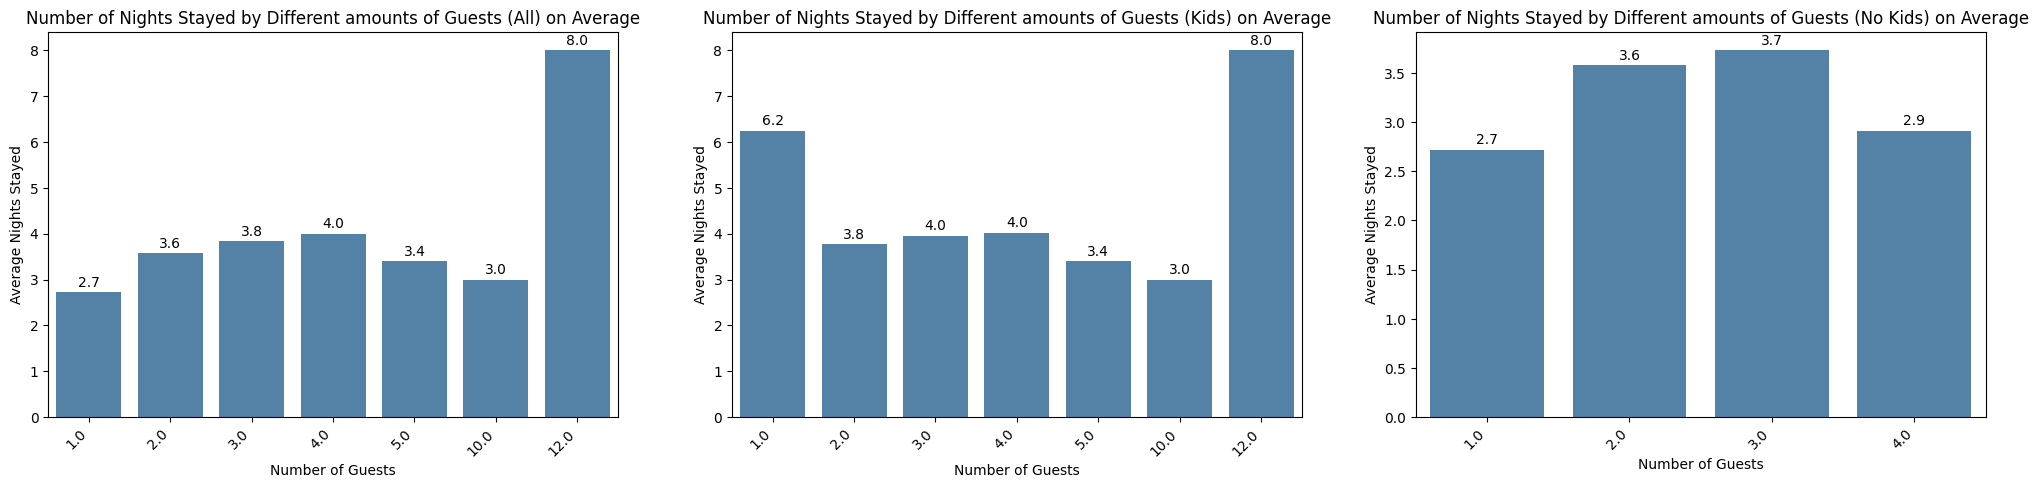

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
barplt1 = sns.barplot(x = dfq3a.index, y = dfq3a["stays_total"], color="steelblue", ax = axes[0])
barplt1.set(xlabel = "Number of Guests", ylabel = "Average Nights Stayed", title = "Number of Nights Stayed by Different amounts of Guests (All) on Average")
barplt1.set_xticklabels(barplt1.get_xticklabels(), rotation=45, horizontalalignment='right')
for j in barplt1.containers:
    barplt1.bar_label(j, padding=2, fmt='%.1f')
    
barplt2 = sns.barplot(x = dfq3b.index, y = dfq3b["stays_total"], color="steelblue", ax = axes[1])
barplt2.set(xlabel = "Number of Guests", ylabel = "Average Nights Stayed", title = "Number of Nights Stayed by Different amounts of Guests (Kids) on Average")
barplt2.set_xticklabels(barplt1.get_xticklabels(), rotation=45, horizontalalignment='right')
for j in barplt2.containers:
    barplt2.bar_label(j, padding=2, fmt='%.1f')
    
barplt3 = sns.barplot(x = dfq3c.index, y = dfq3c["stays_total"], color="steelblue", ax = axes[2])
barplt3.set(xlabel = "Number of Guests", ylabel = "Average Nights Stayed", title = "Number of Nights Stayed by Different amounts of Guests (No Kids) on Average")
barplt3.set_xticklabels(barplt3.get_xticklabels(), rotation=45, horizontalalignment='right')
for j in barplt3.containers:
    barplt3.bar_label(j, padding=2, fmt='%.1f')

In [27]:
X = df[['guests', 'stays_total', 'any_kids']]
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit_predict(X)
Kmean.cluster_centers_

array([[1.94828589, 2.64509824, 0.07138132],
       [2.11253255, 8.04619042, 0.11892902]])

In [28]:
from sklearn import metrics
metrics.silhouette_score(X, Kmean.labels_)

0.6475277257514652

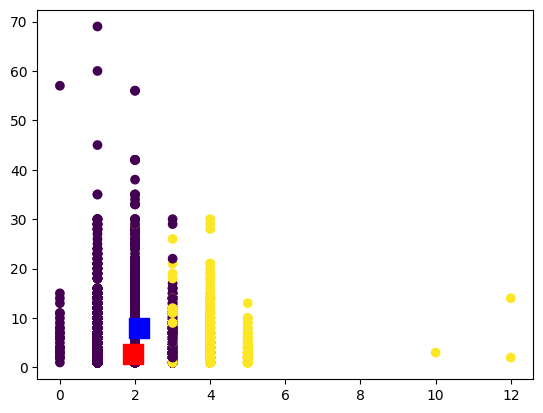

In [29]:
plt.scatter(data=X, x='guests', y='stays_total', c='any_kids')
colors = ['r', 'b', 'c', 'm', 'g', 'k', 'w','orange']
for i, coor in enumerate(Kmean.cluster_centers_):
  plt.scatter(coor[0], coor[1], s=200, c=colors[i], marker='s')
plt.show()

## **Step 4: Present your findings**

### *1. Can we build a classification model to predict if a booking will be cancelled or not?*
##### Choice of Visualization/Model
I chose to use the random forest classifier as it incorporates many decisions trees into the classification to get more accurate results. I was intrigued with using a random forest classifier because I could also display what features influenced the tendency towards a booking getting cancelled or not.
##### Inference
After feeding the data into the model, we were able to generate a **classification model with 89.38% accuracy**. This accuracy could probably be improved using more advanced machine learning techniques, like a neural network. Using a bar plot, we were able to find that the **top three influential features** in splitting data into "cancel" or "no cancel" was **deposit type, country, and lead time**. These insights were valuable in showing us indicators that an individual may eventually cancel. This model, with some improvements, could be used as a valuable resource for apps such as Airbnb and hotel booking sites to caution hosts that an individual may end up cancelling.

### *2. What's the best time to travel if I'm looking to spend the least amount of money?*
##### Choice of Visualization/Model
I chose to use a **series of bar plots** to group the average daily rates by month and day of the week. This provided a clear way of seeing what times of the year were cheaper to book than others.
##### Inference
Using the bar plots, we can determine that the best time to book a trip, given we are on a budget, by month, is **January or February** with daily rates of **68.6 and 70.2 dollars** respectively. If we investigate further, we can see that the best week to book a trip would be either **week 2 or 51** with daily rates of **64.7 and 64.1**. This breakdown by week number provides interesting insights, because we can see that December wasn't considered a top month for good prices because of an outlier week near Christmas and New Year's when Average Daily Rates are more expensive. 

### *3. Can we find any trends on what impact the numbers of individuals staying and the type of people (adults, children, babies) have on the nights stayed?*
##### Choice of Visualization/Model
I chose to use a **series of bar plots** to show the difference between nights stayed among individuals with kids vs no kids. This provided a clear way of seeing the comparison using subplots that were places right next to each other. I also chose to use clustering techniques using kmeans, as I believed it might show natural groupings of data and could point to valuable trends.
##### Inference
Using the bar plots, we can observe that there are **minor differences** in the number of nights stayed in groups with kids versus groups with no kids. For example, **groups of 2, 3, and 4**, **with kids, tended to stay more nights than groups with no kids**. Another unintended observation was that "groups" of 1 with kids stayed an average of 6 nights. This means that one kid is staying at a hotel for an average of 6 nights, which seems incorrect, so it would be helpful to know if there is missing data. In addition, **clustering techniques** were used to see if we could find any natural groupings in data points that might point to a difference in the number of nights stayed and types of people staying. This provided little insights, and just enforced the point that **groups with kids tended to stay more nights** on average. The clustering model had a silhoutte score of .648 which points to clusters being relively dense and nicely seperated.

### Limitations
One major limitation in the data is the fact that we don't have access to the person who conducted this study. I found a few data points that seemed like they may be incorrect but there's no way of knowing without asking the person who collected the data. One example of this was the columns: adults, children, and babies. There were some bookings that included only children, which seems wrong and other's that included 0 people which was likely due to a flaw in the dataset. Another unknown in the dataset was the Average Daily Rate. Some of the observations included negative values which does not make sense in this context, unless explained off as using a credit or something else. It's impossible to know without contacting the collector of this data. <br><br>
Another limitation is that 41% of observations were in Portugal which puts a huge bias on the demographic and the tendencies in hotel booking. I could have decided to filter this down to countries of interest, but ideally, I would have a spread of data across hotels around the world. Also, without knowing if currencies were converted, Average Daily Rate could be for each respective country and not just in dollars which introduces another area that needs to be standardized.<br><br>
While this dataset contained lots of fields and rows, it lacked in providing further explanation in some of the field descriptions. This observation does not fit the conditions of a simple random sample, and therefore the inferences and conclusions can only be taken loosely as its unfair to say they apply to the whole world as a whole.
